In [161]:
import pandas as pd
import yfinance as yf
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import keras
import os
from datetime import datetime, timedelta
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0' 

stock = yf.download(tickers="RELIANCE.NS", period="10y")
df = stock
data = df.filter(['Adj Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
scaler = MinMaxScaler(feature_range=(0,1))

# self.scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
training_data_len = int(np.ceil( len(dataset) * .95 ))
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
model = keras.models.load_model("StockMarketPredictor.h5")
test_data = scaled_data[training_data_len - 60: , :]
print(test_data.shape)
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
print(x_test)
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions.shape)    
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
# print(rmse)
train = data[:training_data_len]
valid = data[training_data_len:]
print(training_data_len)
valid['Predictions'] = predictions
# Visualize the data
train_df = pd.DataFrame({'Date': train.index, 'Close': train['Adj Close']})
train_df = train_df.rename(columns={'Close': 'Train'})
# Create a DataFrame from the validation data and predictions
valid_df = pd.DataFrame({'Date': valid.index, 'Close': valid['Adj Close']})
valid_df['Predictions'] = np.squeeze(predictions)  # Convert predictions to 1D
valid_df = valid_df.rename(columns={'Close': 'Val'})
# Concatenate the training and validation DataFrames
data = pd.concat([train_df, valid_df['Val'], valid_df['Predictions']], axis=1)
fig = px.line(x=train_df["Date"], y=train_df["Train"],title='Stock Price Prediction')
fig.add_scatter(x=valid_df["Date"], y=valid_df["Val"], mode='lines', name='Val', line=dict(color='orange'))
fig.add_scatter(x=valid_df["Date"], y=valid_df["Predictions"], mode='lines', name='Predictions', line=dict(color='red'))
fig.update_traces(line={'width': 2})
# Customize the plot
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Close Price INR',
    font=dict(size=18),
    legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01)
)
fig.show()
#---------------------------------------------------------------------------------------

[*********************100%%**********************]  1 of 1 completed


(183, 1)
[[[0.81334122]
  [0.80455509]
  [0.81395824]
  ...
  [0.74081234]
  [0.734115  ]
  [0.73146992]]

 [[0.80455509]
  [0.81395824]
  [0.82195917]
  ...
  [0.734115  ]
  [0.73146992]
  [0.71800021]]

 [[0.81395824]
  [0.82195917]
  [0.80848085]
  ...
  [0.73146992]
  [0.71800021]
  [0.71603042]]

 ...

 [[0.89498168]
  [0.86580994]
  [0.87729107]
  ...
  [0.96767653]
  [0.97202888]
  [0.97932649]]

 [[0.86580994]
  [0.87729107]
  [0.8841947 ]
  ...
  [0.97202888]
  [0.97932649]
  [0.96392454]]

 [[0.87729107]
  [0.8841947 ]
  [0.95546387]
  ...
  [0.97932649]
  [0.96392454]
  [0.95705846]]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
(123, 1)
2342


C:\Users\iampr\AppData\Local\Temp\ipykernel_4116\4031611188.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
from datetime import datetime, timedelta
today = datetime.today().date()

data = stock.filter(['Adj Close'])
dataset = data.values

last_60_days = dataset[training_data_len:]

scaler = MinMaxScaler(feature_range=(0, 1))
last_60_days_scaled = scaler.fit_transform(last_60_days.reshape(-1, 1))

x_test = []
for i in range(60, len(last_60_days_scaled) + 1):
    x_test.append(last_60_days_scaled[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = keras.models.load_model("StockMarketPredictor.h5")

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

prediction_dates = []
start_date = today
for i in range(len(predictions)):
    prediction_date = start_date + timedelta(days=i)
    prediction_dates.append(prediction_date)

predictions = predictions+(dataset[-1] - predictions[0][0])
predictions_df = pd.DataFrame({'Date': prediction_dates, 'Close': np.squeeze(predictions)})
predictions_df = predictions_df.set_index('Date')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 


,Close
Date,
2024-04-25,2909.600098
2024-04-26,2908.768311
2024-04-27,2891.848389
2024-04-28,2877.343994
2024-04-29,2869.920654


In [163]:
new_data = stock.filter(['Close'])  
new_data.drop(index=data.index[-1], inplace=True)
new_data

,Close
Date,
2014-04-25,433.507996
2014-04-28,432.022217
2014-04-29,429.873535
2014-04-30,427.816284
2014-05-02,424.296082
...,...
2024-04-18,2928.649902
2024-04-19,2940.250000
2024-04-22,2959.699951


In [164]:
fig = px.line(new_data, title='Stock Price Prediction', labels={'value': 'Close Price INR'})
fig.add_scatter(x=predictions_df.index, y=predictions_df['Close'], mode='lines', name='Test', line=dict(color='Orange'))
# fig.add_scatter(x=valid_df["Date"], y=valid_df["Predictions"], mode='lines', name='Predictions', line=dict(color='red'))
fig.show()

In [165]:
import plotly.express as px
px.line(predictions_df)

In [166]:
stock = yf.download(tickers="RELIANCE.NS", period="10y")
df = stock["Close"].values

[*********************100%%**********************]  1 of 1 completed


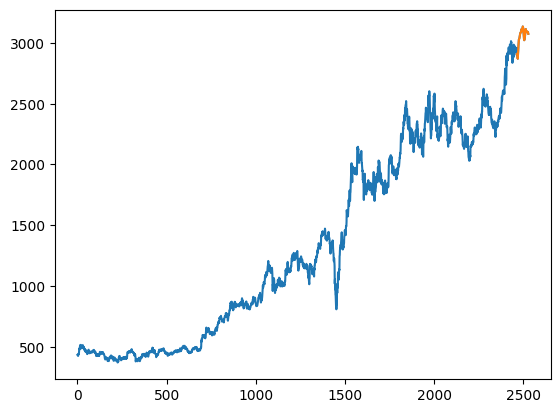

In [167]:
import matplotlib.pyplot as plt
# plt.plot(predictions)
total = np.append(df, predictions)
total
plt.plot(total)
new_df = [np.nan for i in df]
final = np.append(new_df, predictions)
plt.plot(final)

In [168]:
import plotly.express as px
px.line(total)